Accuracy score:  0.33688621787822615
[[2227  226    0]
 [ 597  748    6]
 [   0    0    0]]
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.84      2453
         1.0       0.77      0.55      0.64      1351
         2.0       0.00      0.00      0.00         0

    accuracy                           0.78      3804
   macro avg       0.52      0.49      0.50      3804
weighted avg       0.78      0.78      0.77      3804



C:\Users\masum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC 0.8428166781985411


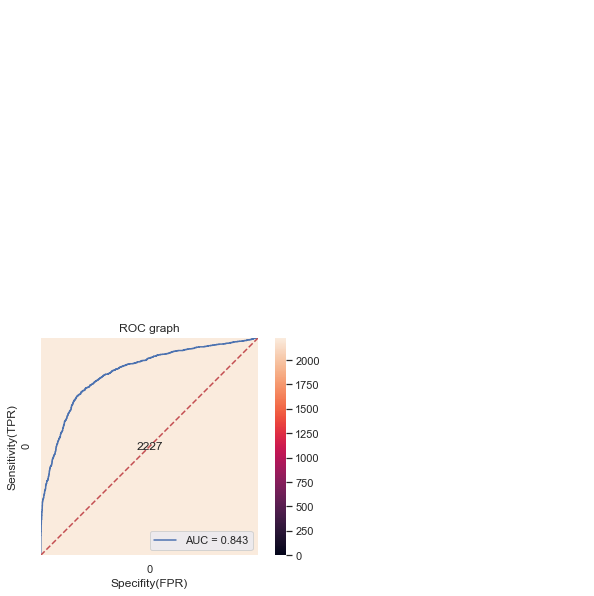

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
url =pd.read_csv(r"Downloads\MagicTelescope-1.csv")
en = preprocessing.LabelEncoder()
en.fit(['h','g'])
url.loc[:,'class'] = en.transform(url['class'])
names = url['class']
data = url.drop('class', axis = 'columns')
url.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, names, test_size=0.2, random_state=600)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Accuracy score: ', regressor.score(X_test, y_test))
y_pred = regressor.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred.round())
print(matrix)
print(classification_report(y_test, y_pred.round()))
from sklearn.metrics import roc_curve, auc
import seaborn as sns; sns.set()
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=True)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc = auc(false_positive_rate, true_positive_rate)
print('ROC',roc)
plt.title('ROC graph')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.3f' %roc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensitivity(TPR)')
plt.xlabel('Specifity(FPR)')
plt.show()

In [2]:
TP = matrix[0][0]
FP = matrix[0][1]
FN = matrix[1][0]
TN = matrix[1][1]
FP = FP.astype(float)
TP = TP.astype(float)
FN = FN.astype(float)
TN = TN.astype(float)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print("TPR" ,TPR)
print("FPR" ,FPR)

TPR 0.7885977337110481
FPR 0.23203285420944558
